In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Fish.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
x=dataset.iloc[:,[2,3,4,5,6]].values
y=dataset.iloc[:,1].values

In [4]:
print(f"{x.shape} {y.shape}")

(159, 5) (159,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 98)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((119, 5), (40, 5), (119,), (40,))

In [6]:
u = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
print(u.shape, std.shape)

(5,) (5,)


In [7]:
x_train = (x_train - u)/std
x_test = (x_test-u)/std
x_train = np.array(x_train)
x_test = np.array(x_test)

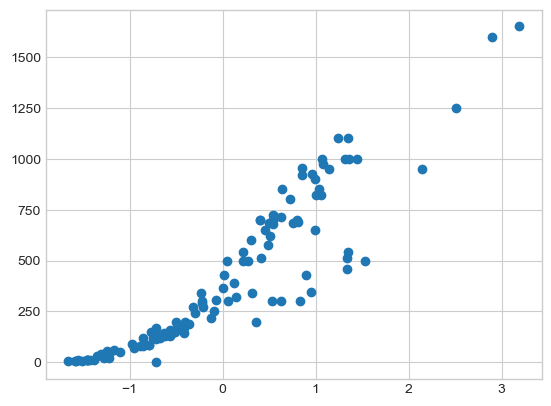

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(x_train[:, 0], y_train)
plt.show()

In [9]:
plt.style.available?

In [10]:
ones = np.ones((x_train.shape[0], 1))
x_train = np.hstack((ones, x_train))
print(x_train[:4, :])

[[ 1.         -1.17034869 -1.17618259 -1.16928945 -0.56168929 -1.17947165]
 [ 1.          2.89689784  2.86277397  2.73731239  0.12001404  1.00553814]
 [ 1.          2.1458715   2.1094405   1.99120174 -0.03194166  1.02105652]
 [ 1.          0.36096475  0.34863696  0.28939879 -0.78928457 -0.57391277]]


In [11]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [12]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [13]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [14]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [15]:
theta, cost_epoch = gradient_descent(x_train, y_train, learning_rate=0.3)

In [16]:
theta

array([403.8       , 158.12079842,  96.78880738, -33.85217645,
        60.55764743,  83.82519858])

In [17]:
cost_epoch

[296082.73579831934,
 107706.65377404047,
 55967.09342977131,
 34841.10518820647,
 24926.179851194243,
 20110.05860425699,
 17751.702669482882,
 16593.80452075008,
 16024.032950432971,
 15742.670799674694,
 15602.841630738874,
 15532.53791960057,
 15496.444607547983,
 15477.233309926363,
 15466.394775716311,
 15459.745323541581,
 15455.223900316985,
 15451.81183856078,
 15449.002951910645,
 15446.543453705854,
 15444.304203453858,
 15442.21787741434,
 15440.248012809618,
 15438.373714445997,
 15436.582068263668,
 15434.864354905669,
 15433.214142571302,
 15431.62631337148,
 15430.096556385868,
 15428.621096236642,
 15427.196542109768,
 15425.819799534878,
 15424.488015703233,
 15423.198543308747,
 15421.94891504449,
 15420.736824524616,
 15419.560111283707,
 15418.416748499285,
 15417.304832623127,
 15416.222574409972,
 15415.168291008704,
 15414.140398888205,
 15413.137407437684,
 15412.15791312548,
 15411.20059413033,
 15410.264205379623,
 15409.347573944138,
 15408.449594749043,
 15

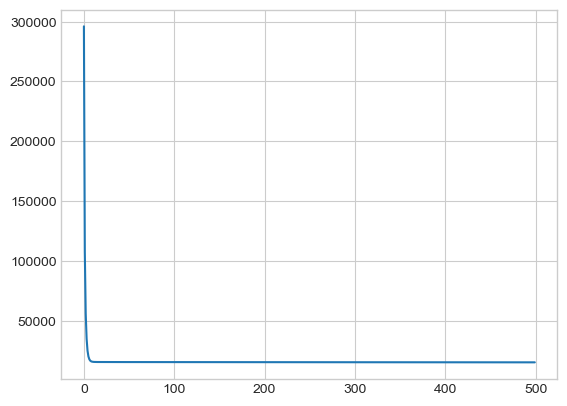

In [18]:
plt.plot(cost_epoch)
plt.show()

In [19]:
ones = np.ones((x_test.shape[0], 1))
x_test = np.hstack((ones, x_test))
print(x_test[:4, :4], x_test.shape)
# y_test = np.array(y_test)
# y_test = y_test.reshape((-1, 1))

[[ 1.          0.70234036  0.77522339  0.94329352]
 [ 1.         -0.70217643 -0.69513833 -0.69144331]
 [ 1.          1.80449589  1.77361715  1.66425437]
 [ 1.          0.3121968   0.29417912  0.30616532]] (40, 6)


In [20]:
y_pred_test = []

for i in range(x_test.shape[0]):
    pred = hypothesis(x_test[i], theta)
    y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [21]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i], y_test[i])

799.2522058155449 1000.0
162.1423575439802 110.0
833.0624302230169 770.0
523.5266849305171 390.0
240.9642463371867 161.0
384.9949794276165 272.0
-178.47359104958733 9.8
-235.55772556322373 5.9
810.9169982796097 900.0
205.27904474440913 110.0
184.4061513221742 120.0
642.3388455599245 556.0
358.6954899678162 265.0
267.0132748373318 180.0
831.4423334041927 1015.0
106.84622564866663 85.0
736.3428933245291 840.0
775.2419080278557 567.0
355.7401757695523 290.0
87.43378729057949 100.0
360.27423804203846 260.0
702.9646789271677 700.0
584.262715353717 600.0
500.949207640003 450.0
550.2630348148891 475.0
185.20553930056184 120.0
293.5290561406172 180.0
332.2929187148882 270.0
202.8270808608505 140.0
165.1884993061386 110.0
306.802374093898 197.0
92.4733800353653 78.0
373.6242105591756 250.0
624.0987040167038 610.0
1137.8374987187776 1550.0
516.2862543094626 450.0
542.5228984303919 500.0
259.18920628217774 225.0
410.15483462820305 300.0
49.596046518651264 70.0


In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("Accuracy: ", metrics.explained_variance_score(y_test, y_pred_test))

MAE: 93.38861920874476
MSE: 14489.872689567297
RMSE: 120.37388707509324
Accuracy:  0.8719974777753976


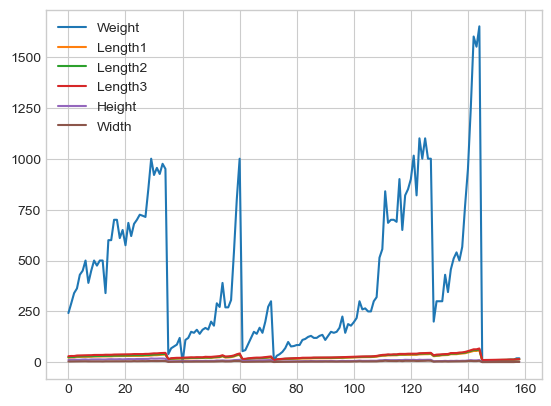

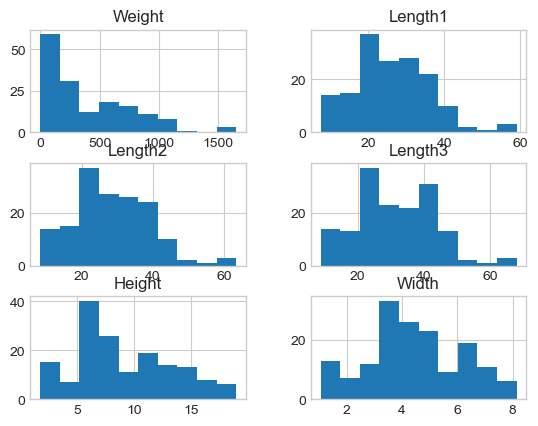

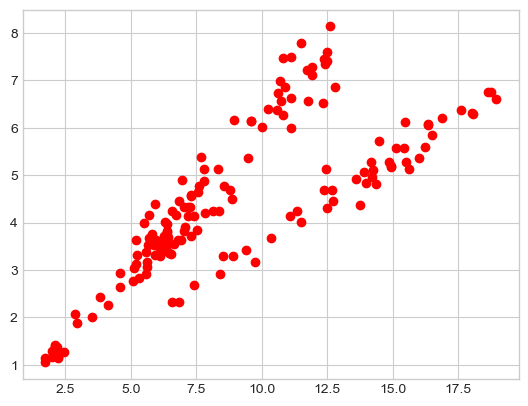

In [23]:
dataset.plot()
dataset.hist()
plt.show()
plt.scatter(dataset["Height"],dataset["Width"],color="red")